# Centrality Measures

In this notebook we look at *centrality measures*, which can be used to quantify how important nodes are in a network.  A wide variety of different centrality measures exist. The choice of appropriate measure depends on the task, and the interpretation of the values it produces depends on the nature of the network. A range of such measures are implemented in *NetworkX*.

https://networkx.org/documentation/stable/reference/algorithms/centrality.html

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.precision", 3)

First, let's load a small sample network representing connections on the LinkedIn platform. The network is stored in the XML-based GEXF format, which NetworkX can read.

In [2]:
g = nx.read_gexf("linkedin25.gexf")

This is a undirected network:

In [3]:
g.is_directed()

False

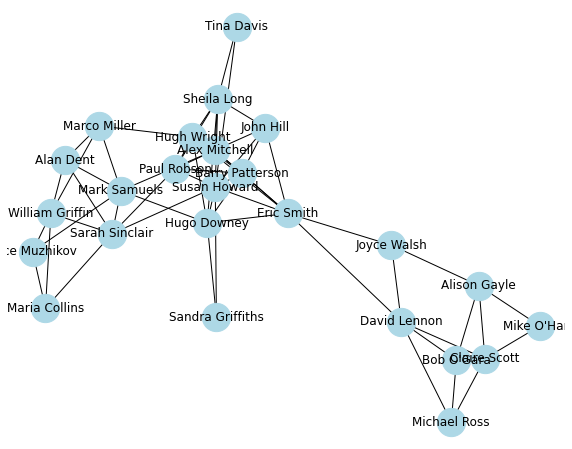

In [4]:
plt.figure(figsize=(10,8))
nx.draw_networkx(g, with_labels=True, node_size=800, node_color="lightblue")
plt.axis("off");

### Node Degree

The **degree** of a node is the number of nodes which it is connected to in the network - i.e. its number of neighbours. The *degree()* function returns the degree for all nodes in a network, or a specified node.

In [5]:
# get degree score for a single user
g.degree("Tina Davis")

2

In [6]:
# get a dictionary of degree scores for all nodes
degrees = dict(g.degree())
degrees

{'Paul Robson': 6,
 'Joyce Walsh': 3,
 'Sandra Griffiths': 2,
 'Maria Collins': 3,
 'Mark Samuels': 6,
 "Mike O'Hara": 2,
 'Alex Mitchell': 6,
 'Hugh Wright': 6,
 'Eric Smith': 8,
 'Claire Scott': 5,
 'William Griffin': 5,
 'Hugo Downey': 7,
 'Susan Howard': 9,
 'Barry Patterson': 7,
 'David Lennon': 5,
 'Tina Davis': 2,
 'Sarah Sinclair': 6,
 "Bob O'Gara": 4,
 'Marco Miller': 4,
 'Sheila Long': 7,
 'Alison Gayle': 4,
 'Alice Muzhikov': 3,
 'Michael Ross': 3,
 'John Hill': 5,
 'Alan Dent': 4}

We could look at various statistics for the degree sequence in this network:

In [7]:
degree_seq = pd.Series(degrees)
degree_seq

Paul Robson         6
Joyce Walsh         3
Sandra Griffiths    2
Maria Collins       3
Mark Samuels        6
Mike O'Hara         2
Alex Mitchell       6
Hugh Wright         6
Eric Smith          8
Claire Scott        5
William Griffin     5
Hugo Downey         7
Susan Howard        9
Barry Patterson     7
David Lennon        5
Tina Davis          2
Sarah Sinclair      6
Bob O'Gara          4
Marco Miller        4
Sheila Long         7
Alison Gayle        4
Alice Muzhikov      3
Michael Ross        3
John Hill           5
Alan Dent           4
dtype: int64

In [8]:
print('Degree range: [%d, %d]' % (degree_seq.min(), degree_seq.max() ) )
print('Mean degree: %.2f' % degree_seq.mean() )
print('Median degree: %d' % degree_seq.median() )

Degree range: [2, 9]
Mean degree: 4.88
Median degree: 5


We could also generate a plot of the **degree distribution** for this network:

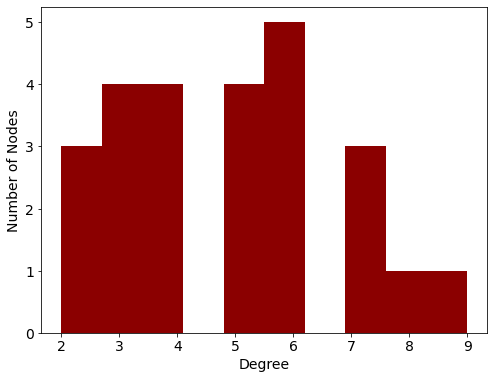

In [9]:
ax = degree_seq.plot.hist(figsize=(8,6), fontsize=14, legend=None, color="darkred")
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Degree", fontsize=14);

### Measuring Centrality

Centrality analysis allows us to identify the most important nodes in a network. The actual definition of importance depends on the nature of the network, and many different centrality measures exist. NetworkX includes implementations of the most common measures.

The most basic measure of centrality, **degree centrality**, is simply the degree of each node divided by $(n-1)$, where $n$ is the total number of nodes. The output is a dictionary, where the keys are the nodes.

In [10]:
deg = nx.degree_centrality(g)
deg

{'Paul Robson': 0.25,
 'Joyce Walsh': 0.125,
 'Sandra Griffiths': 0.08333333333333333,
 'Maria Collins': 0.125,
 'Mark Samuels': 0.25,
 "Mike O'Hara": 0.08333333333333333,
 'Alex Mitchell': 0.25,
 'Hugh Wright': 0.25,
 'Eric Smith': 0.3333333333333333,
 'Claire Scott': 0.20833333333333331,
 'William Griffin': 0.20833333333333331,
 'Hugo Downey': 0.29166666666666663,
 'Susan Howard': 0.375,
 'Barry Patterson': 0.29166666666666663,
 'David Lennon': 0.20833333333333331,
 'Tina Davis': 0.08333333333333333,
 'Sarah Sinclair': 0.25,
 "Bob O'Gara": 0.16666666666666666,
 'Marco Miller': 0.16666666666666666,
 'Sheila Long': 0.29166666666666663,
 'Alison Gayle': 0.16666666666666666,
 'Alice Muzhikov': 0.125,
 'Michael Ross': 0.125,
 'John Hill': 0.20833333333333331,
 'Alan Dent': 0.16666666666666666}

We can use these scores to populate a Pandas *DataFrame* and display a ranking of the nodes by their degree centrality.

In [11]:
s = pd.Series(deg)
df = pd.DataFrame(s,columns=["degree_centrality"])
# display the DataFrame sorted by degree centrality
df.sort_values(by="degree_centrality",ascending=False).head(10)

,degree_centrality
Susan Howard,0.375
Eric Smith,0.333
Sheila Long,0.292
Barry Patterson,0.292
Hugo Downey,0.292
Hugh Wright,0.250
Sarah Sinclair,0.250
Paul Robson,0.250
Alex Mitchell,0.250
Mark Samuels,0.250


Another measure, **betweenness centrality** can be used to find "brokers" or "bridging" nodes in a network.
Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score.

In [12]:
bet = nx.betweenness_centrality(g)
bet

{'Paul Robson': 0.024053945249597423,
 'Joyce Walsh': 0.09903381642512077,
 'Sandra Griffiths': 0.0,
 'Maria Collins': 0.0036231884057971015,
 'Mark Samuels': 0.11751207729468598,
 "Mike O'Hara": 0.0,
 'Alex Mitchell': 0.07367149758454106,
 'Hugh Wright': 0.09259259259259259,
 'Eric Smith': 0.43864734299516905,
 'Claire Scott': 0.04468599033816425,
 'William Griffin': 0.017310789049919485,
 'Hugo Downey': 0.0976449275362319,
 'Susan Howard': 0.22393317230273757,
 'Barry Patterson': 0.016545893719806765,
 'David Lennon': 0.23550724637681159,
 'Tina Davis': 0.0,
 'Sarah Sinclair': 0.14323671497584542,
 "Bob O'Gara": 0.0030193236714975845,
 'Marco Miller': 0.04172705314009663,
 'Sheila Long': 0.0286231884057971,
 'Alison Gayle': 0.041666666666666664,
 'Alice Muzhikov': 0.006461352657004831,
 'Michael Ross': 0.0,
 'John Hill': 0.0075281803542673114,
 'Alan Dent': 0.0038446054750402576}

In [13]:
df["betweenness"] = pd.Series(bet)
df.sort_values(by="betweenness", ascending=False).head(10)

,degree_centrality,betweenness
Eric Smith,0.333,0.439
David Lennon,0.208,0.236
Susan Howard,0.375,0.224
Sarah Sinclair,0.250,0.143
Mark Samuels,0.250,0.118
Joyce Walsh,0.125,0.099
Hugo Downey,0.292,0.098
Hugh Wright,0.250,0.093
Alex Mitchell,0.250,0.074
Claire Scott,0.208,0.045


**Closeness centrality** measures the extent to which a node is close to all other nodes in a network, either directly or indirectly.

In [14]:
close = nx.closeness_centrality(g)
close

{'Paul Robson': 0.42857142857142855,
 'Joyce Walsh': 0.4,
 'Sandra Griffiths': 0.36923076923076925,
 'Maria Collins': 0.32432432432432434,
 'Mark Samuels': 0.42857142857142855,
 "Mike O'Hara": 0.25,
 'Alex Mitchell': 0.47058823529411764,
 'Hugh Wright': 0.48,
 'Eric Smith': 0.5333333333333333,
 'Claire Scott': 0.32,
 'William Griffin': 0.3380281690140845,
 'Hugo Downey': 0.4897959183673469,
 'Susan Howard': 0.5106382978723404,
 'Barry Patterson': 0.47058823529411764,
 'David Lennon': 0.41379310344827586,
 'Tina Davis': 0.36363636363636365,
 'Sarah Sinclair': 0.43636363636363634,
 "Bob O'Gara": 0.3157894736842105,
 'Marco Miller': 0.39344262295081966,
 'Sheila Long': 0.41379310344827586,
 'Alison Gayle': 0.3157894736842105,
 'Alice Muzhikov': 0.32,
 'Michael Ross': 0.3116883116883117,
 'John Hill': 0.4444444444444444,
 'Alan Dent': 0.34285714285714286}

In [15]:
df["closeness"] = pd.Series(close)
df.sort_values(by="closeness",ascending=False).head(10)

,degree_centrality,betweenness,closeness
Eric Smith,0.333,0.439,0.533
Susan Howard,0.375,0.224,0.511
Hugo Downey,0.292,0.098,0.490
Hugh Wright,0.250,0.093,0.480
Barry Patterson,0.292,0.017,0.471
Alex Mitchell,0.250,0.074,0.471
John Hill,0.208,0.008,0.444
Sarah Sinclair,0.250,0.143,0.436
Paul Robson,0.250,0.024,0.429
Mark Samuels,0.250,0.118,0.429


The **eigenvector centrality** of a node proportional to the sum of the centrality scores of its neighbours. This means that a node is important if it connected to other important nodes.


In [16]:
eig = nx.eigenvector_centrality(g)
df["eigenvector"] = pd.Series(eig)
df.sort_values(by="eigenvector", ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector
Susan Howard,0.375,0.224,0.511,0.371
Barry Patterson,0.292,0.017,0.471,0.350
Eric Smith,0.333,0.439,0.533,0.330
Hugo Downey,0.292,0.098,0.490,0.315
Sheila Long,0.292,0.029,0.414,0.315
Paul Robson,0.250,0.024,0.429,0.289
Alex Mitchell,0.250,0.074,0.471,0.282
Hugh Wright,0.250,0.093,0.480,0.278
John Hill,0.208,0.008,0.444,0.270
Sarah Sinclair,0.250,0.143,0.436,0.168


Often the **normalised eigenvector centrality** is reported to allow for comparisons across different networks. Normalisation is done relative to the maximum value in the current network.

In [17]:
df["norm_eigenvector"] = df["eigenvector"]/max(df["eigenvector"])
df.sort_values(by="norm_eigenvector",ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
Susan Howard,0.375,0.224,0.511,0.371,1.000
Barry Patterson,0.292,0.017,0.471,0.350,0.944
Eric Smith,0.333,0.439,0.533,0.330,0.890
Hugo Downey,0.292,0.098,0.490,0.315,0.848
Sheila Long,0.292,0.029,0.414,0.315,0.848
Paul Robson,0.250,0.024,0.429,0.289,0.780
Alex Mitchell,0.250,0.074,0.471,0.282,0.759
Hugh Wright,0.250,0.093,0.480,0.278,0.750
John Hill,0.208,0.008,0.444,0.270,0.728
Sarah Sinclair,0.250,0.143,0.436,0.168,0.453


As we see from the Data Frame, the order of the ranking produced by the various measures can differ, particularly in the case of betweenness centrality.

We could quantify this by looking at the correlation scores between the different measures (i.e. the columns of the Data Frame):

In [18]:
df.corr()

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
degree_centrality,1.000,0.607,0.818,0.830,0.830
betweenness,0.607,1.000,0.648,0.416,0.416
closeness,0.818,0.648,1.000,0.904,0.904
eigenvector,0.830,0.416,0.904,1.000,1.000
norm_eigenvector,0.830,0.416,0.904,1.000,1.000


 In our LinkedIn network, Eric Smith has the highest betweenness score, as he acts as a key bridge in the network.

In [19]:
# Get ranking of the nodes, where 1 indicates the highest rank
df["betweenness"].rank(ascending=False)

Paul Robson         14.0
Joyce Walsh          6.0
Sandra Griffiths    23.5
Maria Collins       20.0
Mark Samuels         5.0
Mike O'Hara         23.5
Alex Mitchell        9.0
Hugh Wright          8.0
Eric Smith           1.0
Claire Scott        10.0
William Griffin     15.0
Hugo Downey          7.0
Susan Howard         3.0
Barry Patterson     16.0
David Lennon         2.0
Tina Davis          23.5
Sarah Sinclair       4.0
Bob O'Gara          21.0
Marco Miller        11.0
Sheila Long         13.0
Alison Gayle        12.0
Alice Muzhikov      18.0
Michael Ross        23.5
John Hill           17.0
Alan Dent           19.0
Name: betweenness, dtype: float64

If we remove Eric from the network, it is no longer connected:

In [20]:
g.remove_node("Eric Smith")

In [21]:
nx.is_connected(g)

False

With this "bridge" node removed, we can see that the network has two distinct components:

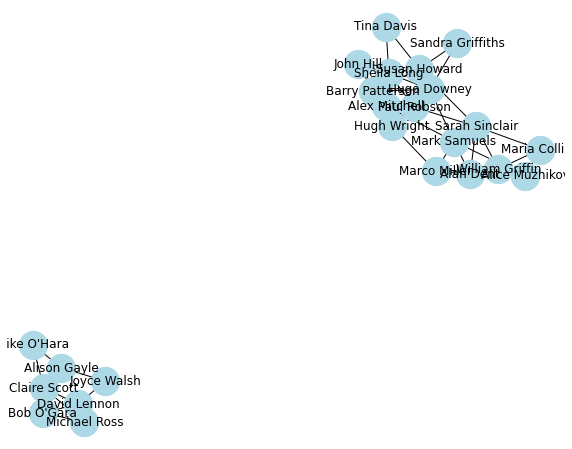

In [22]:
plt.figure(figsize=(10,8))
nx.draw_networkx(g, with_labels=True, node_size=800, node_color="lightblue")
plt.axis("off");